## Feature Selection vs Feature Extraction

Feature selection은 feature의 중요성을 설명할때 aka. 이 feature는 이 모델과 결과에 어떤 영향을 미친다! 라는 점을 말하고 싶을 때 사용 하면 좋다.

Feature extraction은 regularization이 사용되지 못하는 알고리즘에 사용하면 좋다고 한다 => 근데 Regularization이 사용되지 못하는 알고리즘이라는건?
=>검색해도 안나오네..!=> Conv layer의 경우 Regularization 방식을 쓰면 성능이 떨어진다고 함. 그럼 뉴럴 네트워크에서 가능한 이야기인가?

### Cross validation vs Regularization

https://stats.stackexchange.com/questions/472202/when-to-use-regularization-vs-cross-validation

여기에 따르면 Cross validation을 한다고해서 Regularization을 할 필요가 없는건 아니라고 함. 만약 샘플의 수보다 피쳐의 수가 압도적으로 많을 경우, feature의 수를 줄일 필요가 있다고 함. => 당연한 이야기인데 이런 질문이 있었음

In [7]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
iris = load_iris()

columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data,columns = columns)
irisDF['target'] = iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


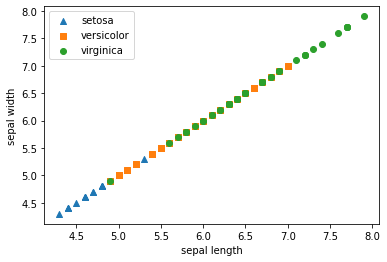

In [10]:
#뭐지 이건?
markers = ['^','s','o']

for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    plt.scatter(x_axis_data,y_axis_data,marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

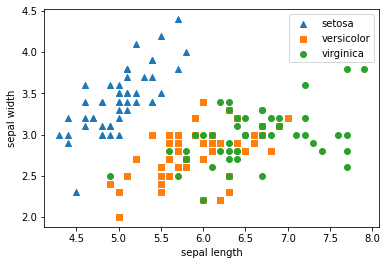

In [12]:
#오타였습니다
markers = ['^','s','o']

for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data,y_axis_data,marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:,:-1])

In [16]:
#iris_scaled
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


decomposition.PCA 에서 있는 항목중에 조금 특이한 attribute들

svd_solver : 여러 옵션이 있는데, 만약 데이터가 500x500 이상이고 80%아래로 데이터를 추출할 거라면, randomized 옵션을 사용한다고 되어있음.
=>특이값 분해라는게 있는데 이거 잘 아시는분? https://angeloyeo.github.io/2019/08/01/SVD.html




In [17]:
pca_columns = ['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca,columns=pca_columns)
irisDF_pca['target'] = iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


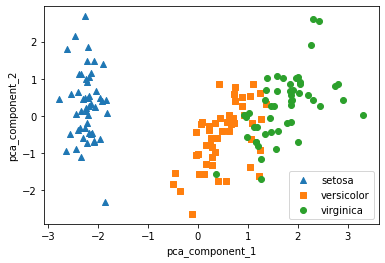

In [19]:
markers = ['^','s','o']

for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF['target']==i]['pca_component_2']
    plt.scatter(x_axis_data,y_axis_data,marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [25]:
#이런 다른 여러가지 pca 결과 표현 방법이 있어용
display(pca.explained_variance_ratio_)
display(pca.explained_variance_)
display(pca.mean_)
display(pca.noise_variance_) #노이즈의 variance를 보여주는 것도 있네요? 신기

array([0.72962445, 0.22850762])

array([2.93808505, 0.9201649 ])

array([-1.69031455e-15, -1.84297022e-15, -1.69864123e-15, -1.40924309e-15])

0.08429784161070522

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf,iris.data,iris.target,scoring='accuracy',cv=3)
print(scores)
print(np.mean(scores))

[0.98 0.94 0.96]
0.96


In [29]:
pca_X = irisDF_pca[['pca_component_1','pca_component_2']]
scores_pca = cross_val_score(rcf,pca_X,iris.target,scoring='accuracy',cv=3)
print(scores_pca)
print(np.mean(scores_pca))

[0.88 0.88 0.88]
0.88
